# Mid_Bootcamp_project
<font size='4'><span style="color: green">Cristian Valeria</span></font>

## Topic: Berlin Crimes: a disctrict analysis
<br>


### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

### 2.Reading Exploring and Cleaning Data

## Maping

In [2]:
#!ls ../Data/Raw/Geo/berlin_districts

In [3]:
districts = gpd.read_file('../Data/Raw/Geo/berlin_districts/lor_bezirksregionen.geojson')

In [4]:
districts.head()

,BEZIRKSNAM,BEZIRKSREG,DATUM_GUEL,FLAECHENGR,broker Dow,geometry
0,Mitte,Tiergarten Süd,26.10.2007,5.171462e+06,010111,"MULTIPOLYGON (((389319.545 5817775.779, 389307..."
1,Mitte,Regierungsviertel,26.10.2007,2.691032e+06,010112,"MULTIPOLYGON (((389869.331 5820074.335, 389882..."
2,Mitte,Alexanderplatz,26.10.2007,6.228903e+06,010113,"MULTIPOLYGON (((391669.886 5818749.585, 391681..."
3,Mitte,Brunnenstraße Süd,26.10.2007,1.753345e+06,010114,"MULTIPOLYGON (((391729.067 5822322.363, 391774..."
4,Mitte,Moabit West,26.10.2007,4.329256e+06,010221,"MULTIPOLYGON (((387739.367 5822280.605, 387766..."


In [5]:
districts = districts.rename(columns={'BEZIRKSNAM':'District','BEZIRKSREG':'Location','broker Dow':'Zipcode'})

In [6]:
districts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   District    138 non-null    object  
 1   Location    138 non-null    object  
 2   DATUM_GUEL  138 non-null    object  
 3   FLAECHENGR  138 non-null    float64 
 4   Zipcode     138 non-null    object  
 5   geometry    138 non-null    geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 6.6+ KB


<AxesSubplot: >

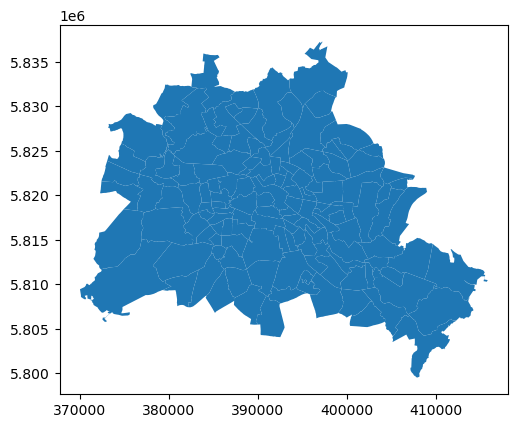

In [7]:
districts.plot()

In [8]:
type(districts)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

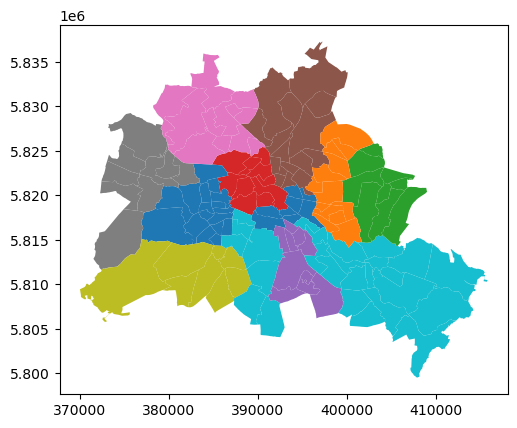

In [9]:
districts.plot(column='District')

In [10]:
districts['District'].unique()

array(['Mitte', 'Friedrichshain-Kreuzberg', 'Pankow',
       'Charlottenburg-Wilmersdorf', 'Spandau', 'Steglitz-Zehlendorf',
       'Tempelhof-Schöneberg', 'Neukölln', 'Treptow-Köpenick',
       'Marzahn-Hellersdorf', 'Lichtenberg', 'Reinickendorf'],
      dtype=object)

In [11]:
crimesdata = pd.read_excel('../Data/cleaned/crimesdata_clean.xlsx')
crimesdata.head()

,Year,District,Zipcode,Location,Robbery,Street_robbery,Body_injuries,Agg_assoult,Threat,Theft,Vehicle,From_car,Bike,Housebreaking,Fire,Damage_property,Graffiti,Drugs,Domestic
0,2012,Mitte,11001,Tiergarten Süd,52,33,482,171,99,1953,16,269,112,68,15,224,23,122,851
1,2012,Mitte,11002,Regierungsviertel,58,25,439,124,129,2975,9,256,147,37,12,327,118,83,799
2,2012,Mitte,11003,Alexanderplatz,194,101,1411,446,259,8297,70,650,732,274,74,1359,480,356,2799
3,2012,Mitte,11004,Brunnenstraße Süd,50,25,241,62,62,1873,85,176,387,131,19,449,153,191,724
4,2012,Mitte,12005,Moabit West,123,45,610,188,190,2396,90,376,321,161,61,495,59,245,1357


In [12]:
crimesdata.shape

(1550, 19)

In [13]:
districts['Zipcode'] = districts.Zipcode.astype('int')

In [14]:
districts.head()

,District,Location,DATUM_GUEL,FLAECHENGR,Zipcode,geometry
0,Mitte,Tiergarten Süd,26.10.2007,5.171462e+06,10111,"MULTIPOLYGON (((389319.545 5817775.779, 389307..."
1,Mitte,Regierungsviertel,26.10.2007,2.691032e+06,10112,"MULTIPOLYGON (((389869.331 5820074.335, 389882..."
2,Mitte,Alexanderplatz,26.10.2007,6.228903e+06,10113,"MULTIPOLYGON (((391669.886 5818749.585, 391681..."
3,Mitte,Brunnenstraße Süd,26.10.2007,1.753345e+06,10114,"MULTIPOLYGON (((391729.067 5822322.363, 391774..."
4,Mitte,Moabit West,26.10.2007,4.329256e+06,10221,"MULTIPOLYGON (((387739.367 5822280.605, 387766..."


In [15]:
crimesdata.head(5)

,Year,District,Zipcode,Location,Robbery,Street_robbery,Body_injuries,Agg_assoult,Threat,Theft,Vehicle,From_car,Bike,Housebreaking,Fire,Damage_property,Graffiti,Drugs,Domestic
0,2012,Mitte,11001,Tiergarten Süd,52,33,482,171,99,1953,16,269,112,68,15,224,23,122,851
1,2012,Mitte,11002,Regierungsviertel,58,25,439,124,129,2975,9,256,147,37,12,327,118,83,799
2,2012,Mitte,11003,Alexanderplatz,194,101,1411,446,259,8297,70,650,732,274,74,1359,480,356,2799
3,2012,Mitte,11004,Brunnenstraße Süd,50,25,241,62,62,1873,85,176,387,131,19,449,153,191,724
4,2012,Mitte,12005,Moabit West,123,45,610,188,190,2396,90,376,321,161,61,495,59,245,1357


### Merge Crimes and Geo

In [16]:
crimes2021 = pd.read_excel('../Data/Cleaned/crimesdata_2021_map.xlsx')

In [17]:
crimesdata_location = crimes2021.merge(districts, on='Zipcode', how='inner')
crimesdata_location.head()

,Year,District_x,Zipcode,Location_x,Robbery,Street_robbery,Body_injuries,Agg_assoult,Threat,Theft,...,Fire,Damage_property,Graffiti,Drugs,Domestic,District_y,Location_y,DATUM_GUEL,FLAECHENGR,geometry
0,2021,Mitte,10111,Tiergarten Süd,35,26,307,84,137,1485,...,16,258,44,200,954,Mitte,Tiergarten Süd,26.10.2007,5.171462e+06,"MULTIPOLYGON (((389319.545 5817775.779, 389307..."
1,2021,Mitte,10112,Regierungsviertel,33,18,405,111,158,2032,...,7,393,108,172,1011,Mitte,Regierungsviertel,26.10.2007,2.691032e+06,"MULTIPOLYGON (((389869.331 5820074.335, 389882..."
2,2021,Mitte,10113,Alexanderplatz,154,93,1414,454,434,6376,...,69,1298,316,857,3222,Mitte,Alexanderplatz,26.10.2007,6.228903e+06,"MULTIPOLYGON (((391669.886 5818749.585, 391681..."
3,2021,Mitte,10114,Brunnenstraße Süd,42,23,259,63,84,1479,...,46,428,102,126,672,Mitte,Brunnenstraße Süd,26.10.2007,1.753345e+06,"MULTIPOLYGON (((391729.067 5822322.363, 391774..."
4,2021,Mitte,10221,Moabit West,48,29,567,169,227,1913,...,63,567,99,521,1349,Mitte,Moabit West,26.10.2007,4.329256e+06,"MULTIPOLYGON (((387739.367 5822280.605, 387766..."


In [18]:
districts.shape

(138, 6)

In [19]:
crimesdata_location.shape

(138, 24)

In [20]:
#districts.to_excel('../Data/Cleaned/districts_codes_geo.xlsx', index = False)

In [21]:
crimesdata_location = crimesdata_location.rename(columns={"District_x": "District", "Location_x": "Location"}) 

In [22]:
crimesdata_location = crimesdata_location.drop(columns=['District_y','Location_y'])

In [23]:
crimesdata_location.head()

,Year,District,Zipcode,Location,Robbery,Street_robbery,Body_injuries,Agg_assoult,Threat,Theft,...,Bike,Housebreaking,Fire,Damage_property,Graffiti,Drugs,Domestic,DATUM_GUEL,FLAECHENGR,geometry
0,2021,Mitte,10111,Tiergarten Süd,35,26,307,84,137,1485,...,235,24,16,258,44,200,954,26.10.2007,5.171462e+06,"MULTIPOLYGON (((389319.545 5817775.779, 389307..."
1,2021,Mitte,10112,Regierungsviertel,33,18,405,111,158,2032,...,246,16,7,393,108,172,1011,26.10.2007,2.691032e+06,"MULTIPOLYGON (((389869.331 5820074.335, 389882..."
2,2021,Mitte,10113,Alexanderplatz,154,93,1414,454,434,6376,...,744,77,69,1298,316,857,3222,26.10.2007,6.228903e+06,"MULTIPOLYGON (((391669.886 5818749.585, 391681..."
3,2021,Mitte,10114,Brunnenstraße Süd,42,23,259,63,84,1479,...,362,32,46,428,102,126,672,26.10.2007,1.753345e+06,"MULTIPOLYGON (((391729.067 5822322.363, 391774..."
4,2021,Mitte,10221,Moabit West,48,29,567,169,227,1913,...,388,69,63,567,99,521,1349,26.10.2007,4.329256e+06,"MULTIPOLYGON (((387739.367 5822280.605, 387766..."


## Maping just 12 districts & 2021

In [24]:
districts_12 = gpd.read_file('../Data/Raw/Geo/bezirksgrenzen.geojson')

<AxesSubplot: >

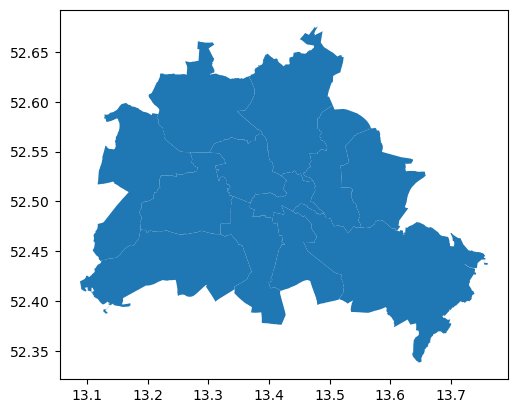

In [25]:
districts_12.plot()

In [26]:
crimes_districts = pd.read_excel('../Data/Cleaned/crimes_district.xlsx')

In [27]:
crimes_districts.head(3)

,Year,Country,City,District,Robbery,Street_robbery,Body_injuries,Agg_assoult,Threat,Theft,Vehicle,From_car,Bike,Housebreaking,Fire,Damage_property,Graffiti,Drugs,Domestic,Total_crimes
0,2012,Germany,Berlin,Charlottenburg Nord,643,248,4224,1195,1427,24061,707,3770,3173,1544,178,3975,847,1064,9997,57053
1,2012,Germany,Berlin,Friedrichshain-Kreuzberg,868,504,4613,1383,1153,22050,436,2380,3285,1214,419,5499,1311,1853,11001,57969
2,2012,Germany,Berlin,Lichtenberg,260,112,2570,586,789,11911,445,1979,1418,632,254,3355,896,335,6252,31794


In [28]:
crimes_districts_2021 = crimes_districts[crimes_districts.Year==2021].reset_index(drop=True)

In [29]:
districts_12 = districts_12.rename(columns={'Gemeinde_name':'District','Gemeinde_schluessel':'DNumber'})

In [30]:
crimes_districts_2021.District.unique()

array(['Charlottenburg Nord', 'Friedrichshain-Kreuzberg', 'Lichtenberg',
       'Marzahn-Hellersdorf', 'Mitte', 'Neukölln', 'Pankow',
       'Reinickendorf', 'Spandau', 'Steglitz-Zehlendorf',
       'Tempelhof-Schöneberg', 'Treptow-Köpenick'], dtype=object)

In [31]:
districts_12.District.unique()

array(['Reinickendorf', 'Charlottenburg-Wilmersdorf', 'Treptow-Köpenick',
       'Pankow', 'Neukölln', 'Lichtenberg', 'Marzahn-Hellersdorf',
       'Spandau', 'Steglitz-Zehlendorf', 'Mitte',
       'Friedrichshain-Kreuzberg', 'Tempelhof-Schöneberg'], dtype=object)

In [32]:
def replace(x):
    if x == 'Charlottenburg Nord':
        return 'Charlottenburg'
    else:
        return x

crimes_districts_2021['District'] = crimes_districts_2021['District'].apply(replace)

In [33]:
def replace(x):
    if x == 'Charlottenburg-Wilmersdorf':
        return 'Charlottenburg'
    else:
        return x

districts_12['District'] = districts_12['District'].apply(replace)

In [34]:
crimes_districts_2021 = crimes_districts_2021.merge(districts_12, on='District', how='inner')

In [35]:
crimes_districts_2021.head()

,Year,Country,City,District,Robbery,Street_robbery,Body_injuries,Agg_assoult,Threat,Theft,...,Graffiti,Drugs,Domestic,Total_crimes,gml_id,DNumber,Land_name,Land_schluessel,Schluessel_gesamt,geometry
0,2021,Germany,Berlin,Charlottenburg,347,201,3501,865,1715,19545,...,905,1407,9821,51198,s_wfs_alkis_bezirk.F176__2,004,Berlin,11,11000004,"MULTIPOLYGON (((13.32111 52.52446, 13.32103 52..."
1,2021,Germany,Berlin,Friedrichshain-Kreuzberg,714,450,4162,1397,1403,21574,...,1081,4771,10751,59301,s_wfs_alkis_bezirk.F176__11,002,Berlin,11,11000002,"MULTIPOLYGON (((13.45529 52.52127, 13.45542 52..."
2,2021,Germany,Berlin,Lichtenberg,223,139,2857,655,1159,10750,...,721,707,6579,31555,s_wfs_alkis_bezirk.F176__6,011,Berlin,11,11000011,"MULTIPOLYGON (((13.52316 52.47424, 13.52367 52..."
3,2021,Germany,Berlin,Marzahn-Hellersdorf,233,169,2672,570,1186,8283,...,470,488,6035,26201,s_wfs_alkis_bezirk.F176__7,010,Berlin,11,11000010,"MULTIPOLYGON (((13.61317 52.47213, 13.61329 52..."
4,2021,Germany,Berlin,Mitte,750,448,6730,2033,2578,27017,...,1282,3823,15795,75003,s_wfs_alkis_bezirk.F176__10,001,Berlin,11,11000001,"MULTIPOLYGON (((13.37721 52.56091, 13.37715 52..."


<AxesSubplot: >

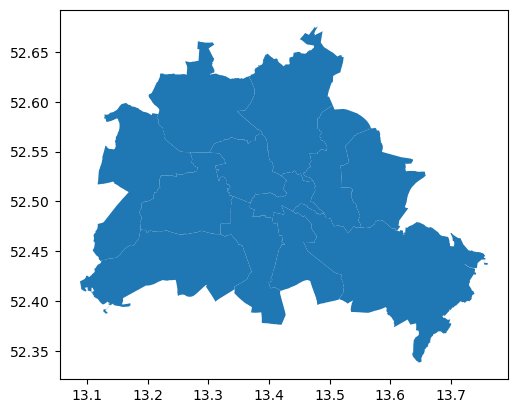

In [36]:
districts_12.plot() #,'District','Robbery']]

In [37]:
crimes_districts_2021[['District','Robbery']]

,District,Robbery
0,Charlottenburg,347
1,Friedrichshain-Kreuzberg,714
2,Lichtenberg,223
3,Marzahn-Hellersdorf,233
4,Mitte,750
5,Neukölln,395
6,Pankow,336
7,Reinickendorf,216
8,Spandau,204
9,Steglitz-Zehlendorf,154


### Plot per Crime

In [38]:
crimes_districts_2021.columns

Index(['Year', 'Country', 'City', 'District', 'Robbery', 'Street_robbery',
       'Body_injuries', 'Agg_assoult', 'Threat', 'Theft', 'Vehicle',
       'From_car', 'Bike', 'Housebreaking', 'Fire', 'Damage_property',
       'Graffiti', 'Drugs', 'Domestic ', 'Total_crimes', 'gml_id', 'DNumber',
       'Land_name', 'Land_schluessel', 'Schluessel_gesamt', 'geometry'],
      dtype='object')

In [39]:
crimes = crimes_districts_2021[['District','Robbery', 'Street_robbery',
       'Body_injuries', 'Agg_assoult', 'Threat', 'Theft', 'Vehicle',
       'From_car', 'Bike', 'Housebreaking', 'Fire', 'Damage_property',
       'Graffiti', 'Drugs', 'Domestic ', 'Total_crimes']]
crimes.head()

,District,Robbery,Street_robbery,Body_injuries,Agg_assoult,Threat,Theft,Vehicle,From_car,Bike,Housebreaking,Fire,Damage_property,Graffiti,Drugs,Domestic,Total_crimes
0,Charlottenburg,347,201,3501,865,1715,19545,548,4376,2869,676,338,4084,905,1407,9821,51198
1,Friedrichshain-Kreuzberg,714,450,4162,1397,1403,21574,223,3443,3320,310,497,5205,1081,4771,10751,59301
2,Lichtenberg,223,139,2857,655,1159,10750,415,1932,1500,262,325,3331,721,707,6579,31555
3,Marzahn-Hellersdorf,233,169,2672,570,1186,8283,344,1611,816,237,222,2865,470,488,6035,26201
4,Mitte,750,448,6730,2033,2578,27017,344,3636,3637,500,462,5968,1282,3823,15795,75003


In [40]:
crime_map = districts_12.merge(crimes, on='District', how='inner')
crime_map.head(2)

,gml_id,District,DNumber,Land_name,Land_schluessel,Schluessel_gesamt,geometry,Robbery,Street_robbery,Body_injuries,...,Vehicle,From_car,Bike,Housebreaking,Fire,Damage_property,Graffiti,Drugs,Domestic,Total_crimes
0,s_wfs_alkis_bezirk.F176__1,Reinickendorf,012,Berlin,11,11000012,"MULTIPOLYGON (((13.32074 52.62660, 13.32045 52...",216,113,2472,...,204,1629,908,293,239,2370,342,713,5762,25442
1,s_wfs_alkis_bezirk.F176__2,Charlottenburg,004,Berlin,11,11000004,"MULTIPOLYGON (((13.32111 52.52446, 13.32103 52...",347,201,3501,...,548,4376,2869,676,338,4084,905,1407,9821,51198


<Figure size 640x480 with 0 Axes>

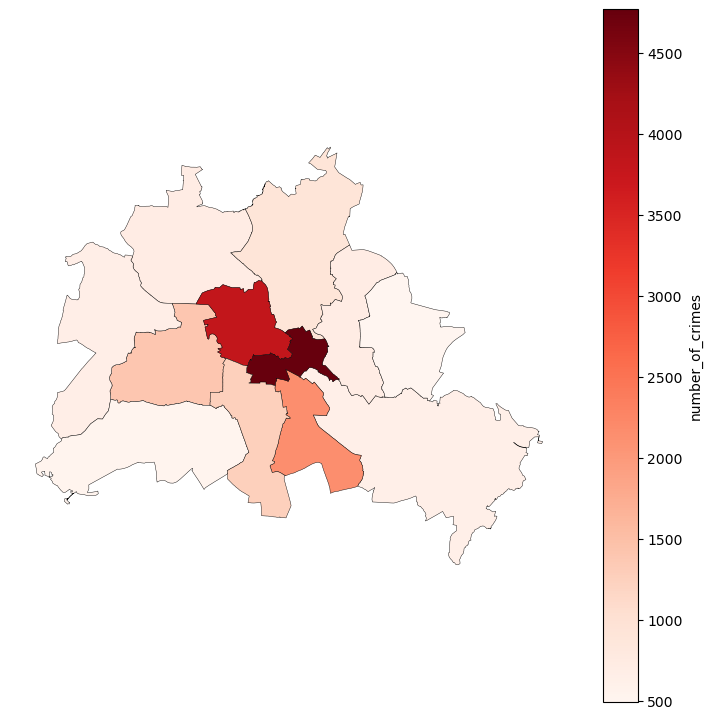

In [56]:
fig = plt.figure();
ax = crime_map.plot(column='Drugs',
                 legend=True,
                 legend_kwds={'label': "number_of_crimes",'orientation': "vertical"},
                 cmap='Reds',figsize=(9,9),
                 linewidth=0.3,
                 edgecolor='k');

ax.set_axis_off();
plt.show();

In [57]:
crime_map[['District','Drugs']].sort_values(by='Drugs', ascending=False)

,District,Drugs
10,Friedrichshain-Kreuzberg,4771
9,Mitte,3823
4,Neukölln,2146
1,Charlottenburg,1407
11,Tempelhof-Schöneberg,1264
3,Pankow,921
0,Reinickendorf,713
5,Lichtenberg,707
7,Spandau,659
2,Treptow-Köpenick,643


In [43]:
crimes_distrit_2021_Hz = pd.read_excel('../Data/Cleaned/crimes_district_Hz.xlsx')

In [44]:
crimes_distrit_2021_Hz .head(2)

,Year,District,Robbery,Street_robbery,Body_injuries,Agg_assoult,Threat,Theft,Vehicle,From_car,Bike,Housebreaking,Fire,Damage_property,Graffiti,Drugs,Domestic,Total_crimes
0,2012,Charlottenburg Nord,1915,718,12360,3637,4412,71947,2285,12258,9190,5486,618,11855,2415,3409,30326,172831
1,2012,Friedrichshain-Kreuzberg,2324,1325,12706,3862,3154,62118,1251,6083,8968,3336,1190,14580,3084,4676,30055,158712


In [45]:
crimes_distrit_2021_Hz = crimes_distrit_2021_Hz[crimes_distrit_2021_Hz.Year==2021]

In [46]:
crimes_distrit_2021_Hz = crimes_distrit_2021_Hz.drop(columns='Year') 

In [47]:
crime_map_Hz = districts_12.merge(crimes_distrit_2021_Hz, on='District', how='inner')
crime_map_Hz.head(2)

,gml_id,District,DNumber,Land_name,Land_schluessel,Schluessel_gesamt,geometry,Robbery,Street_robbery,Body_injuries,...,Vehicle,From_car,Bike,Housebreaking,Fire,Damage_property,Graffiti,Drugs,Domestic,Total_crimes
0,s_wfs_alkis_bezirk.F176__1,Reinickendorf,012,Berlin,11,11000012,"MULTIPOLYGON (((13.32074 52.62660, 13.32045 52...",924,465,11061,...,918,7233,3787,1326,995,10214,1379,3267,25971,114033
1,s_wfs_alkis_bezirk.F176__3,Treptow-Köpenick,009,Berlin,11,11000009,"MULTIPOLYGON (((13.57925 52.39083, 13.57958 52...",1093,578,15485,...,2084,9798,14583,2594,1446,20506,5062,4552,38269,199448


<Figure size 640x480 with 0 Axes>

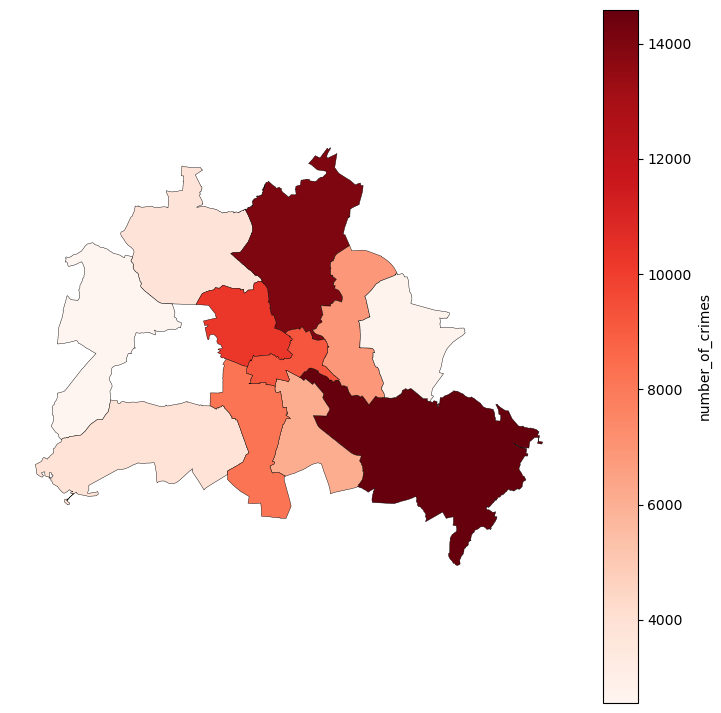

In [53]:
fig = plt.figure();
ax = crime_map_Hz.plot(column='Bike',
                 legend=True,
                 legend_kwds={'label': "number_of_crimes",'orientation': "vertical"},
                 cmap='Reds',figsize=(9,9),
                 linewidth=0.3,
                 edgecolor='k');

ax.set_axis_off();
plt.show();

In [52]:
crime_map_Hz[['District','Bike']].sort_values(by='Bike', ascending=False)

,District,Bike
1,Treptow-Köpenick,14583
2,Pankow,14006
8,Mitte,10254
9,Friedrichshain-Kreuzberg,9184
10,Tempelhof-Schöneberg,8169
4,Lichtenberg,6875
3,Neukölln,6105
7,Steglitz-Zehlendorf,3914
0,Reinickendorf,3787
5,Marzahn-Hellersdorf,2742
